In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer
import fxrate


In [2]:
(x_train, t_train) = fxrate.load_data(r'data/train/201601/**', bar_num=10, forward=1)
(x_test, t_test) = fxrate.load_data(r'data/test/201701/**', bar_num=10, forward=1)

In [3]:
# 高速化のため訓練データの削減
x_train = x_train[:500]
t_train = t_train[:500]
x_test = x_test[:500]
t_test = t_test[:500]

In [4]:
def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=80, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=3, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_test, t_test,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list

In [5]:
# ハイパーパラメータのランダム探索======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 探索したハイパーパラメータの範囲を指定===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

val acc:0.348 | lr:0.0037515910514657105, weight decay:2.1846253614366796e-05
val acc:0.336 | lr:2.426791638233092e-06, weight decay:2.218867023807295e-06
val acc:0.348 | lr:5.257902663969049e-05, weight decay:8.288608411662404e-07
val acc:0.268 | lr:5.8713093199711165e-05, weight decay:1.082338125674407e-05
val acc:0.37 | lr:0.005121677042768369, weight decay:3.828704361958339e-05
val acc:0.278 | lr:1.0563812292906571e-05, weight decay:1.3293999176595645e-07
val acc:0.42 | lr:0.00646209720480034, weight decay:3.064955111836601e-05
val acc:0.478 | lr:2.6532441360286757e-06, weight decay:7.71513592005895e-06
val acc:0.476 | lr:1.028455176672703e-05, weight decay:9.383269517372296e-07
val acc:0.274 | lr:4.946003114182585e-05, weight decay:1.638850722525653e-05
val acc:0.444 | lr:9.436268281013227e-06, weight decay:2.046890149144767e-07
val acc:0.442 | lr:8.736443120333267e-06, weight decay:2.5749342194929358e-05
val acc:0.352 | lr:0.0030186973819600954, weight decay:6.415004533239031e-07

=========== Hyper-Parameter Optimization Result ===========
Best-1(val acc:0.478) | lr:2.6532441360286757e-06, weight decay:7.71513592005895e-06
Best-2(val acc:0.476) | lr:1.028455176672703e-05, weight decay:9.383269517372296e-07
Best-3(val acc:0.476) | lr:2.1809462587090467e-06, weight decay:7.408781978054615e-06
Best-4(val acc:0.474) | lr:4.452461044415206e-06, weight decay:7.331299309253842e-06
Best-5(val acc:0.474) | lr:2.389039735960946e-06, weight decay:2.109778965614754e-06
Best-6(val acc:0.474) | lr:5.575303904281903e-06, weight decay:1.4046731198147441e-07
Best-7(val acc:0.464) | lr:1.2349288219142915e-05, weight decay:3.148988355074173e-06
Best-8(val acc:0.45) | lr:1.1061551724802149e-06, weight decay:1.8915999557353997e-08
Best-9(val acc:0.444) | lr:9.436268281013227e-06, weight decay:2.046890149144767e-07
Best-10(val acc:0.442) | lr:8.736443120333267e-06, weight decay:2.5749342194929358e-05
Best-11(val acc:0.428) | lr:0.009921302148281666, weight decay:1.116422415873999e-08

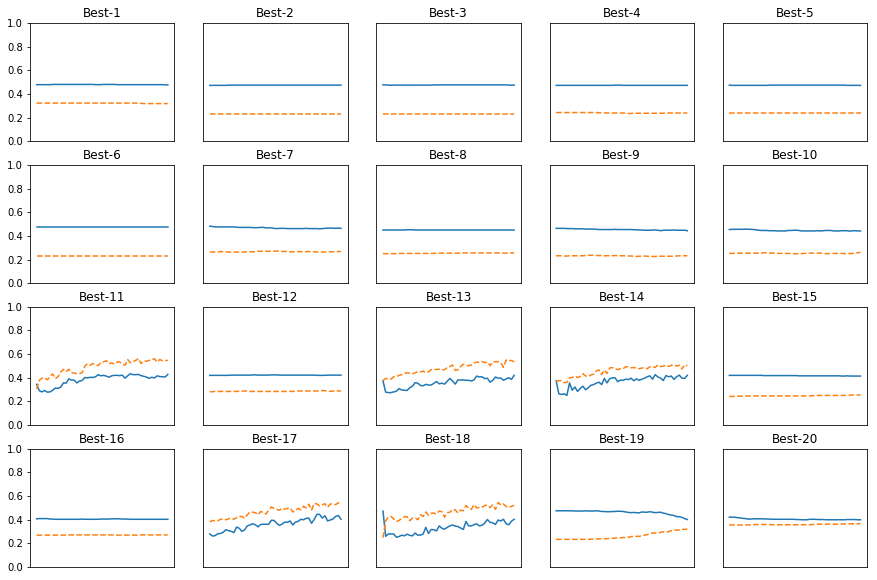

In [6]:
# グラフの描画========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0
plt.figure(figsize=(15,10))

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()

In [4]:
df = fxrate.load_csv(r'data/train/201601/**')
df


,time,bid_op,bid_hi,bid_lo,bid_cl,ask_op,ask_hi,ask_lo,ask_cl
5756,2016/01/18 07:01:00,116.723,116.840,116.711,116.840,116.803,116.901,116.777,116.894
5757,2016/01/18 07:02:00,116.840,116.840,116.819,116.819,116.894,116.894,116.859,116.859
5758,2016/01/18 07:03:00,116.819,116.863,116.817,116.825,116.859,116.903,116.853,116.865
5759,2016/01/18 07:04:00,116.825,116.857,116.825,116.844,116.865,116.893,116.865,116.884
5760,2016/01/18 07:05:00,116.844,116.869,116.838,116.853,116.884,116.906,116.877,116.877
5761,2016/01/18 07:06:00,116.853,116.873,116.853,116.862,116.877,116.910,116.877,116.898
5762,2016/01/18 07:07:00,116.862,116.868,116.848,116.849,116.898,116.902,116.885,116.885
5763,2016/01/18 07:08:00,116.849,116.885,116.849,116.885,116.885,116.925,116.885,116.925
5764,2016/01/18 07:09:00,116.885,116.973,116.885,116.954,116.925,117.020,116.925,116.990
5765,2016/01/18 07:10:00,116.954,116.954,116.882,116.900,116.990,116.990,116.945,116.946


In [6]:
df_unit = df.iloc[:10,1:].values.flatten()


In [7]:
np.min(df_unit)


116.711

In [8]:
min = np.min(df_unit)

In [9]:
max = np.max(df_unit)

TypeError: Could not operate 1 with block values must be str, not int

In [21]:
df2 = df.iloc[:10,1:]
vals = df2.values.flatten()
vals = vals - np.amin(vals)
vals = vals / np.amax(vals)
vals

array([ 0.03883495,  0.41747573,  0.        ,  0.41747573,  0.29773463,
        0.61488673,  0.21359223,  0.59223301,  0.41747573,  0.41747573,
        0.34951456,  0.34951456,  0.59223301,  0.59223301,  0.4789644 ,
        0.4789644 ,  0.34951456,  0.49190939,  0.34304207,  0.36893204,
        0.4789644 ,  0.62135922,  0.45954693,  0.49838188,  0.36893204,
        0.47249191,  0.36893204,  0.43042071,  0.49838188,  0.58899676,
        0.49838188,  0.55987055,  0.43042071,  0.51132686,  0.41100324,
        0.45954693,  0.55987055,  0.63106796,  0.53721683,  0.53721683,
        0.45954693,  0.52427184,  0.45954693,  0.48867314,  0.53721683,
        0.64401294,  0.53721683,  0.60517799,  0.48867314,  0.50809061,
        0.4433657 ,  0.44660194,  0.60517799,  0.61812298,  0.5631068 ,
        0.5631068 ,  0.44660194,  0.5631068 ,  0.44660194,  0.5631068 ,
        0.5631068 ,  0.69255663,  0.5631068 ,  0.69255663,  0.5631068 ,
        0.84789644,  0.5631068 ,  0.78640777,  0.69255663,  1.  

In [22]:
[True, False, False]

[True, False, False]